# Jan Bronicki 249011


## Zadanie 2

Korzystając ze zbioru danych z pliku „injection_molding_dataset”, przeanalizować dane i zbudować model regresji logistycznej. Trzeba przeanalizować zależność między parametrami, ich wzajemny wpływ oraz wpływ na jakość otrzymanych części. Parametrem zależnym (tym, który chcemy prognozować) w zbiorze danych jest jakość produkowanych części. Należy spróbować zbudować model regresji logistycznej o dokładności powyżej 90%.
Wyniki należy zaprezentować w formie raportu w formacie PDF.


In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
file_path = "injection_molding_dataset.csv"
df: pd.DataFrame = pd.read_csv(file_path, delimiter=";")
df

,Melt temperature,Mold temperature,time_to_fill,ZDx - Plasticizing time,ZUx - Cycle time,SKx - Closing force,SKs - Clamping force peak value,Ms - Torque peak value current cycle,Mm - Torque mean value current cycle,APSs - Specific back pressure peak value,APVs - Specific injection pressure peak value,CPn - Screw position at the end of hold pressure,SVo - Shot volume,quality
0,106.476184,80.617,7.124,3.16,74.83,886.900000,904.000000,116.9,104.300000,145.6,922.3,8.82,18.73,1.0
1,105.505000,81.362,6.968,3.16,74.81,919.409791,935.900000,113.9,104.900000,145.6,930.5,8.59,18.73,1.0
2,105.505000,80.411,6.864,4.08,74.81,908.600000,902.344823,120.5,106.503496,147.0,933.1,8.80,18.98,1.0
3,106.474827,81.162,6.864,3.16,74.82,879.410871,902.033653,127.3,104.900000,145.6,922.3,8.85,18.73,1.0
4,106.466140,81.471,6.864,3.22,74.83,885.644260,902.821269,120.5,106.700000,145.6,917.5,8.80,18.75,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,106.072000,81.493,6.188,2.87,75.65,905.500000,920.800000,114.5,107.500000,145.5,907.3,8.96,18.61,4.0
1447,106.026000,81.456,6.084,2.87,75.63,906.800000,922.500000,122.3,106.600000,144.9,905.6,8.92,18.65,4.0
1448,106.064000,81.420,6.188,2.84,75.66,905.900000,922.100000,125.2,110.700000,147.5,921.6,8.97,18.60,4.0
1449,106.131000,81.401,6.188,2.89,75.67,907.200000,921.500000,120.8,106.900000,145.4,895.5,8.93,18.63,4.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 14 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Melt temperature                                  1451 non-null   float64
 1   Mold temperature                                  1451 non-null   float64
 2   time_to_fill                                      1451 non-null   float64
 3   ZDx - Plasticizing time                           1451 non-null   float64
 4   ZUx - Cycle time                                  1451 non-null   float64
 5   SKx - Closing force                               1451 non-null   float64
 6   SKs - Clamping force peak value                   1451 non-null   float64
 7   Ms - Torque peak value current cycle              1451 non-null   float64
 8   Mm - Torque mean value current cycle              1451 non-null   float64
 9   APSs - Specific bac

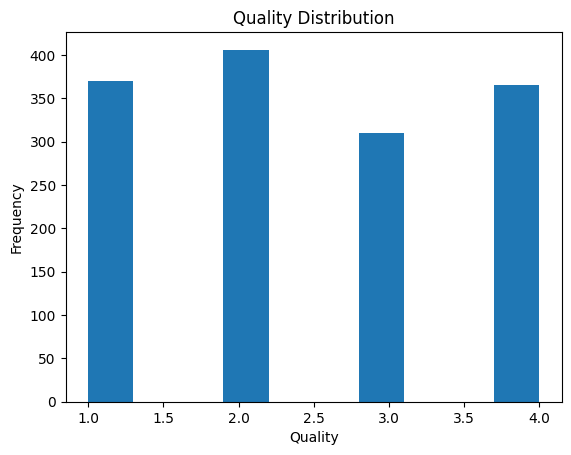

In [127]:
plt.hist(df["quality"])
plt.title("Quality Distribution")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.show()

In [18]:
# Split the dataset into features and target
x = df.drop("quality", axis=1)
y = df["quality"]

In [132]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=123
)


# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
logisticRegr = LogisticRegression(max_iter=1000)


# Train the model
logisticRegr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logisticRegr.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8705234159779615

In [133]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

         1.0       0.82      0.76      0.79        98
         2.0       0.76      0.85      0.80        92
         3.0       0.96      0.92      0.94        83
         4.0       0.96      0.98      0.97        90

    accuracy                           0.87       363
   macro avg       0.88      0.87      0.87       363
weighted avg       0.87      0.87      0.87       363



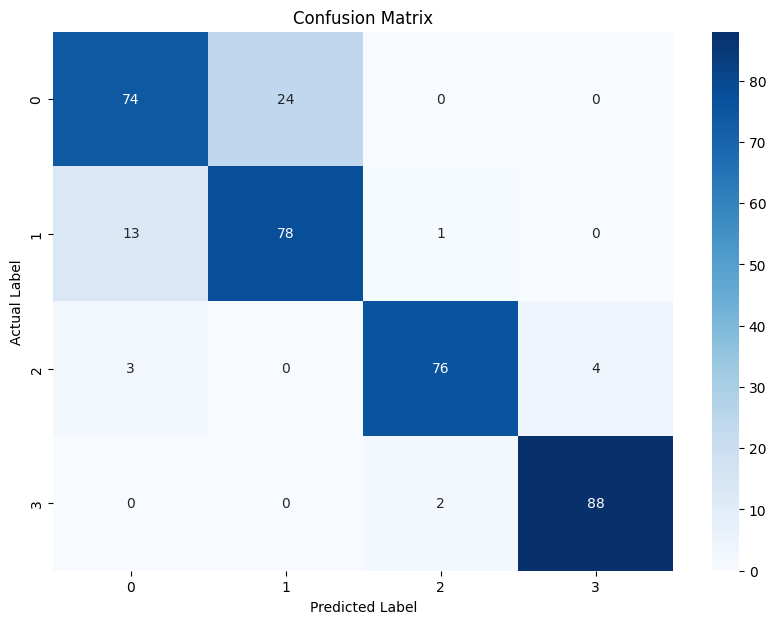

In [134]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

In [135]:
roc_auc = roc_auc_score(
    y_test, logisticRegr.predict_proba(X_test_scaled), multi_class="ovr"
)
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.966415035305559


In [136]:
fpr = {}
tpr = {}
thresh = {}

n_class = len(logisticRegr.classes_)
n_class

4

/Users/john/Documents/University/ZIP/metody-inteligentne-w-org-prod/venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


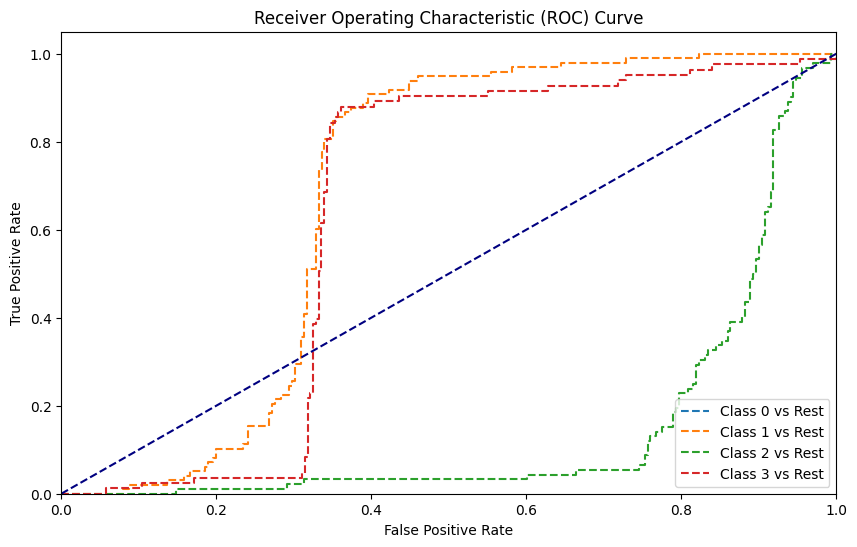

In [137]:

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(
        y_test, logisticRegr.predict_proba(X_test_scaled)[:, i], pos_label=i
    )

plt.figure(figsize=(10, 6))
for i in range(n_class):
    plt.plot(fpr[i], tpr[i], linestyle="--", label=f"Class {i} vs Rest")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()